In [17]:
# Importing numpy, pandas for Data Manupulation
import numpy as np
import pandas as pd

#Importing matplotlib & seaborn for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Import sklearn for Model Building
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

#For MSE & RMSE
from sklearn.metrics import mean_squared_error, r2_score

#For train & test
from sklearn.model_selection import train_test_split

%matplotlib inline



### Reading csv file Historical_wildfires: 

In [2]:
#Contains Estimated Fire Area for training the Model
df_wildfires=pd.read_csv("Historical_Wildfires_BASE4.csv")

df_wildfires.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [3]:
#To check the Data Types
df_wildfires.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

### Using Transpose of the Array of shape (X, Y) to change the shape (Y, X)

In [4]:
df_wildfires.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Estimated_fire_area,26689.0,143.771912,313.349568,1.0,8.820000,38.241667,146.412857,10120.943170
Mean_estimated_fire_brightness,26689.0,319.706604,8.886413,290.7,313.963044,319.838044,325.465217,381.950000
Mean_estimated_fire_radiative_power,26689.0,83.679701,67.788523,0.0,44.118182,67.117143,103.152381,2178.600000
Mean_confidence,26689.0,87.579269,4.374162,76.0,85.000000,87.781250,90.500000,100.000000
Std_confidence,24449.0,7.229078,1.997452,0.0,6.687146,7.707661,8.239279,16.970563
Var_confidence,24449.0,56.249225,25.927542,0.0,44.717927,59.408040,67.885714,288.000000
Count,26689.0,71.824272,150.507579,1.0,5.000000,20.000000,74.000000,3954.000000


In [5]:
#Tofind the Number of Records & Regions in the following format
print("Number of records: {}".format(len(df_wildfires)))
print("Number of regions: {}\n".format(len(df_wildfires['Region'].unique())))
print(df_wildfires['Region'].unique())

Number of records: 26689
Number of regions: 7

['NSW' 'NT' 'QL' 'SA' 'TA' 'VI' 'WA']


In [6]:
###Converting DATE Column to datetime
df_wildfires['Date'] = pd.to_datetime(df_wildfires['Date'])
print("Minimum Date: {}".format(df_wildfires['Date'].min()))
print("Maximum Date: {}".format(df_wildfires['Date'].max()))

Minimum Date: 2005-01-01 00:00:00
Maximum Date: 2021-01-15 00:00:00


In [7]:
#Null values checking, if any...
df_wildfires.isna().sum()

Region                                    0
Date                                      0
Estimated_fire_area                       0
Mean_estimated_fire_brightness            0
Mean_estimated_fire_radiative_power       0
Mean_confidence                           0
Std_confidence                         2240
Var_confidence                         2240
Count                                     0
Replaced                                  0
dtype: int64

In [8]:
#To find reason behind NULL values
df_wildfires.loc[df_wildfires.Std_confidence.isna(), :]

df_wildfires.loc[df_wildfires.Var_confidence.isna(), :]

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
48,NSW,2005-02-26,1.00,303.15,8.0,79.0,NaN,NaN,1,R
149,NSW,2005-06-12,1.00,302.55,17.9,79.0,NaN,NaN,1,R
154,NSW,2005-06-18,5.27,301.30,71.9,77.0,NaN,NaN,1,R
157,NSW,2005-06-25,9.60,300.70,145.9,76.0,NaN,NaN,1,R
163,NSW,2005-07-09,2.80,294.65,37.8,79.0,NaN,NaN,1,R
...,...,...,...,...,...,...,...,...,...,...
26541,WA,2020-08-13,1.10,320.35,27.1,83.0,NaN,NaN,1,N
26542,WA,2020-08-14,1.00,302.15,15.8,77.0,NaN,NaN,1,N
26545,WA,2020-08-20,1.92,326.85,86.2,92.0,NaN,NaN,1,N
26547,WA,2020-08-22,2.47,321.10,43.9,79.0,NaN,NaN,1,N


In [9]:
#Cross Checking while std_confidence & var_confidence is NaN
df_wildfires.loc[(df_wildfires['Std_confidence'].isna()) & (df_wildfires['Var_confidence'].isna()), ['Count']].drop_duplicates().reset_index(drop=True)

,Count
0,1


### Now,To Visualize the Estimated Fire Area

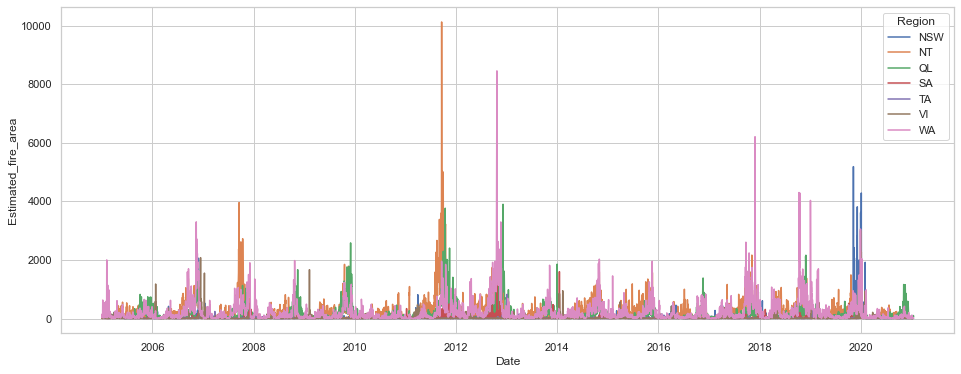

In [10]:
#For Historical_Wildfires
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
geo = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region', data=df_wildfires)

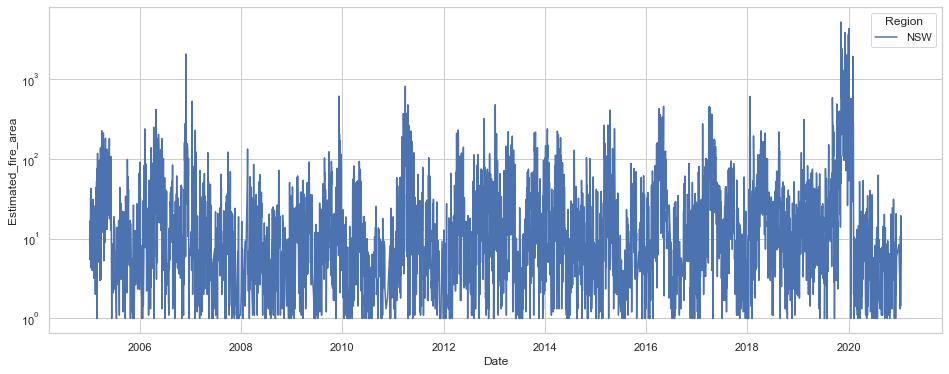

In [11]:
#Visualize Log wise Estimated Fire Area
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
geo = sns.lineplot(x="Date", y="Estimated_fire_area", hue='Region',
                 data=df_wildfires[df_wildfires['Region']=='NSW'])
geo.set_yscale("log")

Text(0, 0.5, 'Estimated Fire Area')

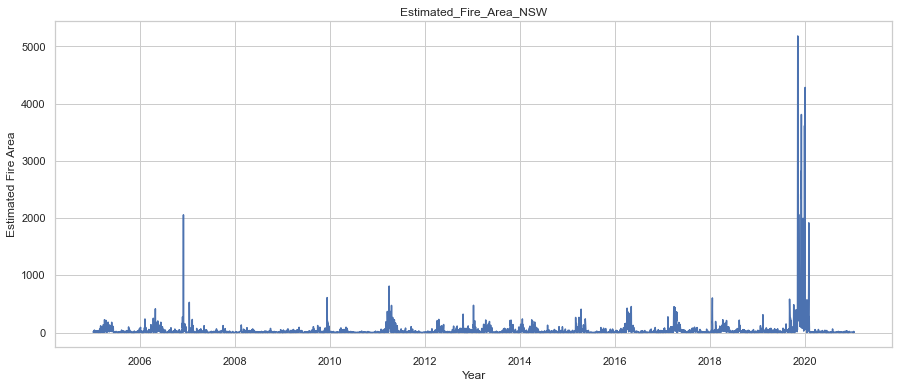

In [12]:
# To Visualize the Estimated  fire area for a specific region over time
fig, ax = plt.subplots(figsize = (15, 6))
df_NSW = df_wildfires[df_wildfires["Region"] == "NSW"]

sns.lineplot(df_NSW["Date"], df_NSW["Estimated_fire_area"])

ax.set_title("Estimated_Fire_Area_NSW")
ax.set_xlabel("Year")
ax.set_ylabel("Estimated Fire Area")



In [13]:
#Seasonality checking breaking Date into segments
df_NSW["day"] = df_NSW["Date"].dt.day
df_NSW["month"] = df_NSW["Date"].dt.month
df_NSW["year"] = df_NSW["Date"].dt.year


C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

Text(0, 0.5, 'Fire Area - Seasonality')

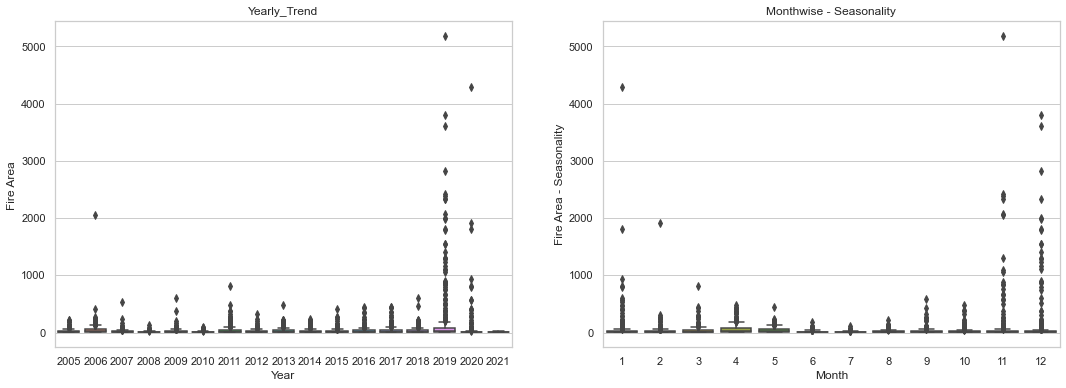

In [14]:
#Seasonality checking using Box plot for NSW
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

sns.boxplot(df_NSW["year"], df_NSW["Estimated_fire_area"], ax = ax[0])
ax[0].set_title("Yearly_Trend")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Fire Area ")

sns.boxplot(df_NSW["month"], df_NSW["Estimated_fire_area"], ax = ax[1])
ax[1].set_title("Monthwise - Seasonality")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Fire Area - Seasonality")


### So, from the above Visualization of Historical_Wildfires Data it is shown that there is a Trend & Seasonality, Data is not Stationary 


# Now for the Historical_Weather Dataset
N.B: Daily aggregates computed from the hourly ERA5 climate re-analysis.

In [15]:
#Reading Data
df_weather=pd.read_csv("HistoricalWeather.csv")

df_weather.head()

,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
0,2005-01-01,NSW,Precipitation,800234.348986,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,800234.348986,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,800234.348986,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,800234.348986,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,800234.348986,14.485785,35.878704,27.341182,18.562212


In [16]:
#Converting Date column to datetime
df_weather["Date"] = pd.to_datetime(df_wt["Date"])


NameError: name 'df_wt' is not defined

In [ ]:
# Checking the info of Data
df_weather.info


In [ ]:
#DATA analysis
print("Number of records: {}".format(len(df_weather)))
print("Number of regions: {}\n".format(len(df_weather['Region'].unique())))
print(df_weather['Region'].unique())

In [ ]:
df_weather.describe().T

In [ ]:
#Checking for Missing values
df_weather.isna().sum()

In [ ]:
#Checking for Data Type
df_weather.dtypes

In [ ]:
#Renaming the Columns
df_weather = df_weather.rename(columns={"count()[unit: km^2]": "Area", "min()": "Min",
                                       "max()": "Max", "mean()": "Mean", "variance()": "Variance"})

df_weather['Date'] = pd.to_datetime(df_weather['Date'])

df_weather.head()

In [ ]:
df_weather.head()

In [ ]:
#Checking for Unique Area
df_weather['Area'].unique()

In [ ]:
#Re-arranging Data
df_pivot = df_weather.pivot_table(values=['Min','Max','Mean','Variance'], index=['Date','Region'],
                                  columns=['Parameter'])

In [ ]:
#Re-Set Index
df_pivot.reset_index(inplace=True)

In [ ]:
#Rename Columns
df_pivot.columns = [col[0] if not(col[1]) else '{1}_{0}'.format(*col) for col in df_pivot.columns.values]

In [ ]:
#Re-Arranging Columns & Data
params = df_pivot.columns.tolist()[3:]
params.sort()
weather_df = df_pivot[df_pivot.columns.tolist()[:3] + params].copy()
weather_df.head()

In [ ]:
###Now, to Visualize Data taking Average Temperature 

plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
geo = sns.lineplot(x="Date", y="Temperature_Mean",hue='Region', data=weather_df)

In [ ]:
#Visualize Mean of Soilwatercontent
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="SoilWaterContent_Mean",hue='Region', data=weather_df)


### Historical Weather Forecast Data

In [ ]:
#Reading file
df_forecast = pd.read_csv("HistoricalWeatherForecasts.csv")

df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

df_forecast.head()

In [ ]:
### Forecast predictions cecking for each day

df_forecast['Lead time'].unique()

In [ ]:
#Data Selection by Taking into a Single Region - Monthly
date1 = '2020-01-01'
date2='2020-01-31'
region1 = 'NSW'

forecast_NSW_1 = df_forecast[(df_forecast['Parameter']== 'Temperature') & (df_forecast['Region']== region1)]
forecast_NSW_1 = forecast_NSW_1.set_index(['Date'])
forecast_NSW_2 = forecast_NSW_1.loc[date1:date2]
forecast_NSW_2.head()

### Visualize to compare

In [ ]:
#Observation in a same period

weather_df_NSW = weather_df[weather_df['Region']=='NSW']

weather_df_NSW = weather_df_NSW.set_index(['Date'])
observation_1 = weather_df_NSW.loc[date1:date2]
observation_1.head()


In [ ]:
[fig,ax] = plt.subplots(1, figsize=(16, 8))

observation_1['Temperature_Mean'].plot();

forecast_NSW_2['mean()'][forecast_NSW_2['Lead time']== 5].plot();
forecast_NSW_2['mean()'][forecast_NSW_2['Lead time']== 10].plot();
forecast_NSW_2['mean()'][forecast_NSW_2['Lead time']== 15].plot();

ax.legend(['observed T','5 day lead time','10 day lead time','15 day lead time']);

### Future Analysis:The above analysis of Historical Weather Forecast Data is the KEY to builds Model to predict before the Bushfire Happen!

In [ ]:
# Now, Merging the Weather Data & Historical Forecast together
df_all = df_wildfires.merge(weather_df, how='left', on=['Date', 'Region'])

# Transpose the Data
df_all.describe().transpose()

In [ ]:
#Taking NSW DataFrame
df_NSW = df_all[df_all['Region']=='NSW']
df_NSW.head()

### Region-wise Data Distribution

In [ ]:
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")

geo = sns.displot(data=df_all, x="Estimated_fire_area", hue="Region", kind="kde", log_scale=True)

In [ ]:
#Visualization on Average Precepitation
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")
geo = sns.displot(data=df_all, x="Precipitation_Mean", hue="Region", kind="kde")

In [ ]:
#Tofind Wind Speed
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")
geo = sns.displot(data=df_all, x="WindSpeed_Max", hue="Region", kind="kde")

### Now, to find the Correlation 

In [ ]:
df_correlation = df_all.drop(['Region', 'Date', 'Mean_confidence', 'Std_confidence','Var_confidence','Count', 'Replaced'], axis=1).copy()

plt.figure(figsize = (20, 12))
sns.heatmap(df_correlation.corr(), cmap = "coolwarm", annot= True, vmin = 0, vmax = 1)

In [ ]:
### Average Solar Radioation Vs. Relative Humidity
sns.jointplot(x='RelativeHumidity_Mean', y='SolarRadiation_Mean', data=df_all, kind="reg")

In [ ]:
sns.lmplot(x='RelativeHumidity_Mean', y='SolarRadiation_Mean', hue='Region', data=df_all)

In [ ]:
sns.lmplot(x='Temperature_Mean', y='SolarRadiation_Mean', hue='Region', data=df_all)

In [ ]:
sns.lmplot(x='WindSpeed_Max', y='Estimated_fire_area', hue='Region', data=df_all)